In [8]:
import osmuf as ouf

In [9]:
# dictionary of places of interest for convenience, 
places = {0:{'name':'buenos_aires', 'coordinates':(-34.5798,-58.4422),},
          1:{'name':'kaduna', 'coordinates':(10.53364, 7.37360),},
          2:{'name':'margery_street', 'coordinates':(51.5266,-0.1109),},
          3:{'name':'posadas', 'coordinates':(-27.37577,-55.90059),},
          4:{'name':'welwyn_garden_city', 'coordinates':(51.7938,-0.18645),},
          5:{'name':'hayes_lane', 'coordinates':(51.39425,-0.003),}
         }

# bounding box half-distance in meters
distance=500

In [10]:
place=places[0]

place_name=place['name']
point=place['coordinates']

# 03 - GSI and FSI
Ground Space Index and Floorspace Index, also known as Site Coverage and Floor Area Ratio

In [11]:
# retrieve the data
study_area = ouf.study_area_from_point(point, distance)
city_blocks = ouf.city_blocks_from_point(point, distance)
buildings = ouf.buildings_from_gdf(city_blocks)
street_graph = ouf.street_graph_from_gdf(city_blocks)
streets = ouf.streets_from_street_graph(street_graph)

In [12]:
# process the data
city_blocks, city_blocks_gross = ouf.gen_city_blocks_gross(street_graph, city_blocks)
city_blocks_form_factor = ouf.form_factor(city_blocks)
buildings = ouf.join_buildings_city_block_id(buildings, city_blocks)
buildings = ouf.join_buildings_street_id(buildings, streets)
city_blocks = ouf.join_city_blocks_building_data(city_blocks, buildings)

## City blocks coloured by GSI

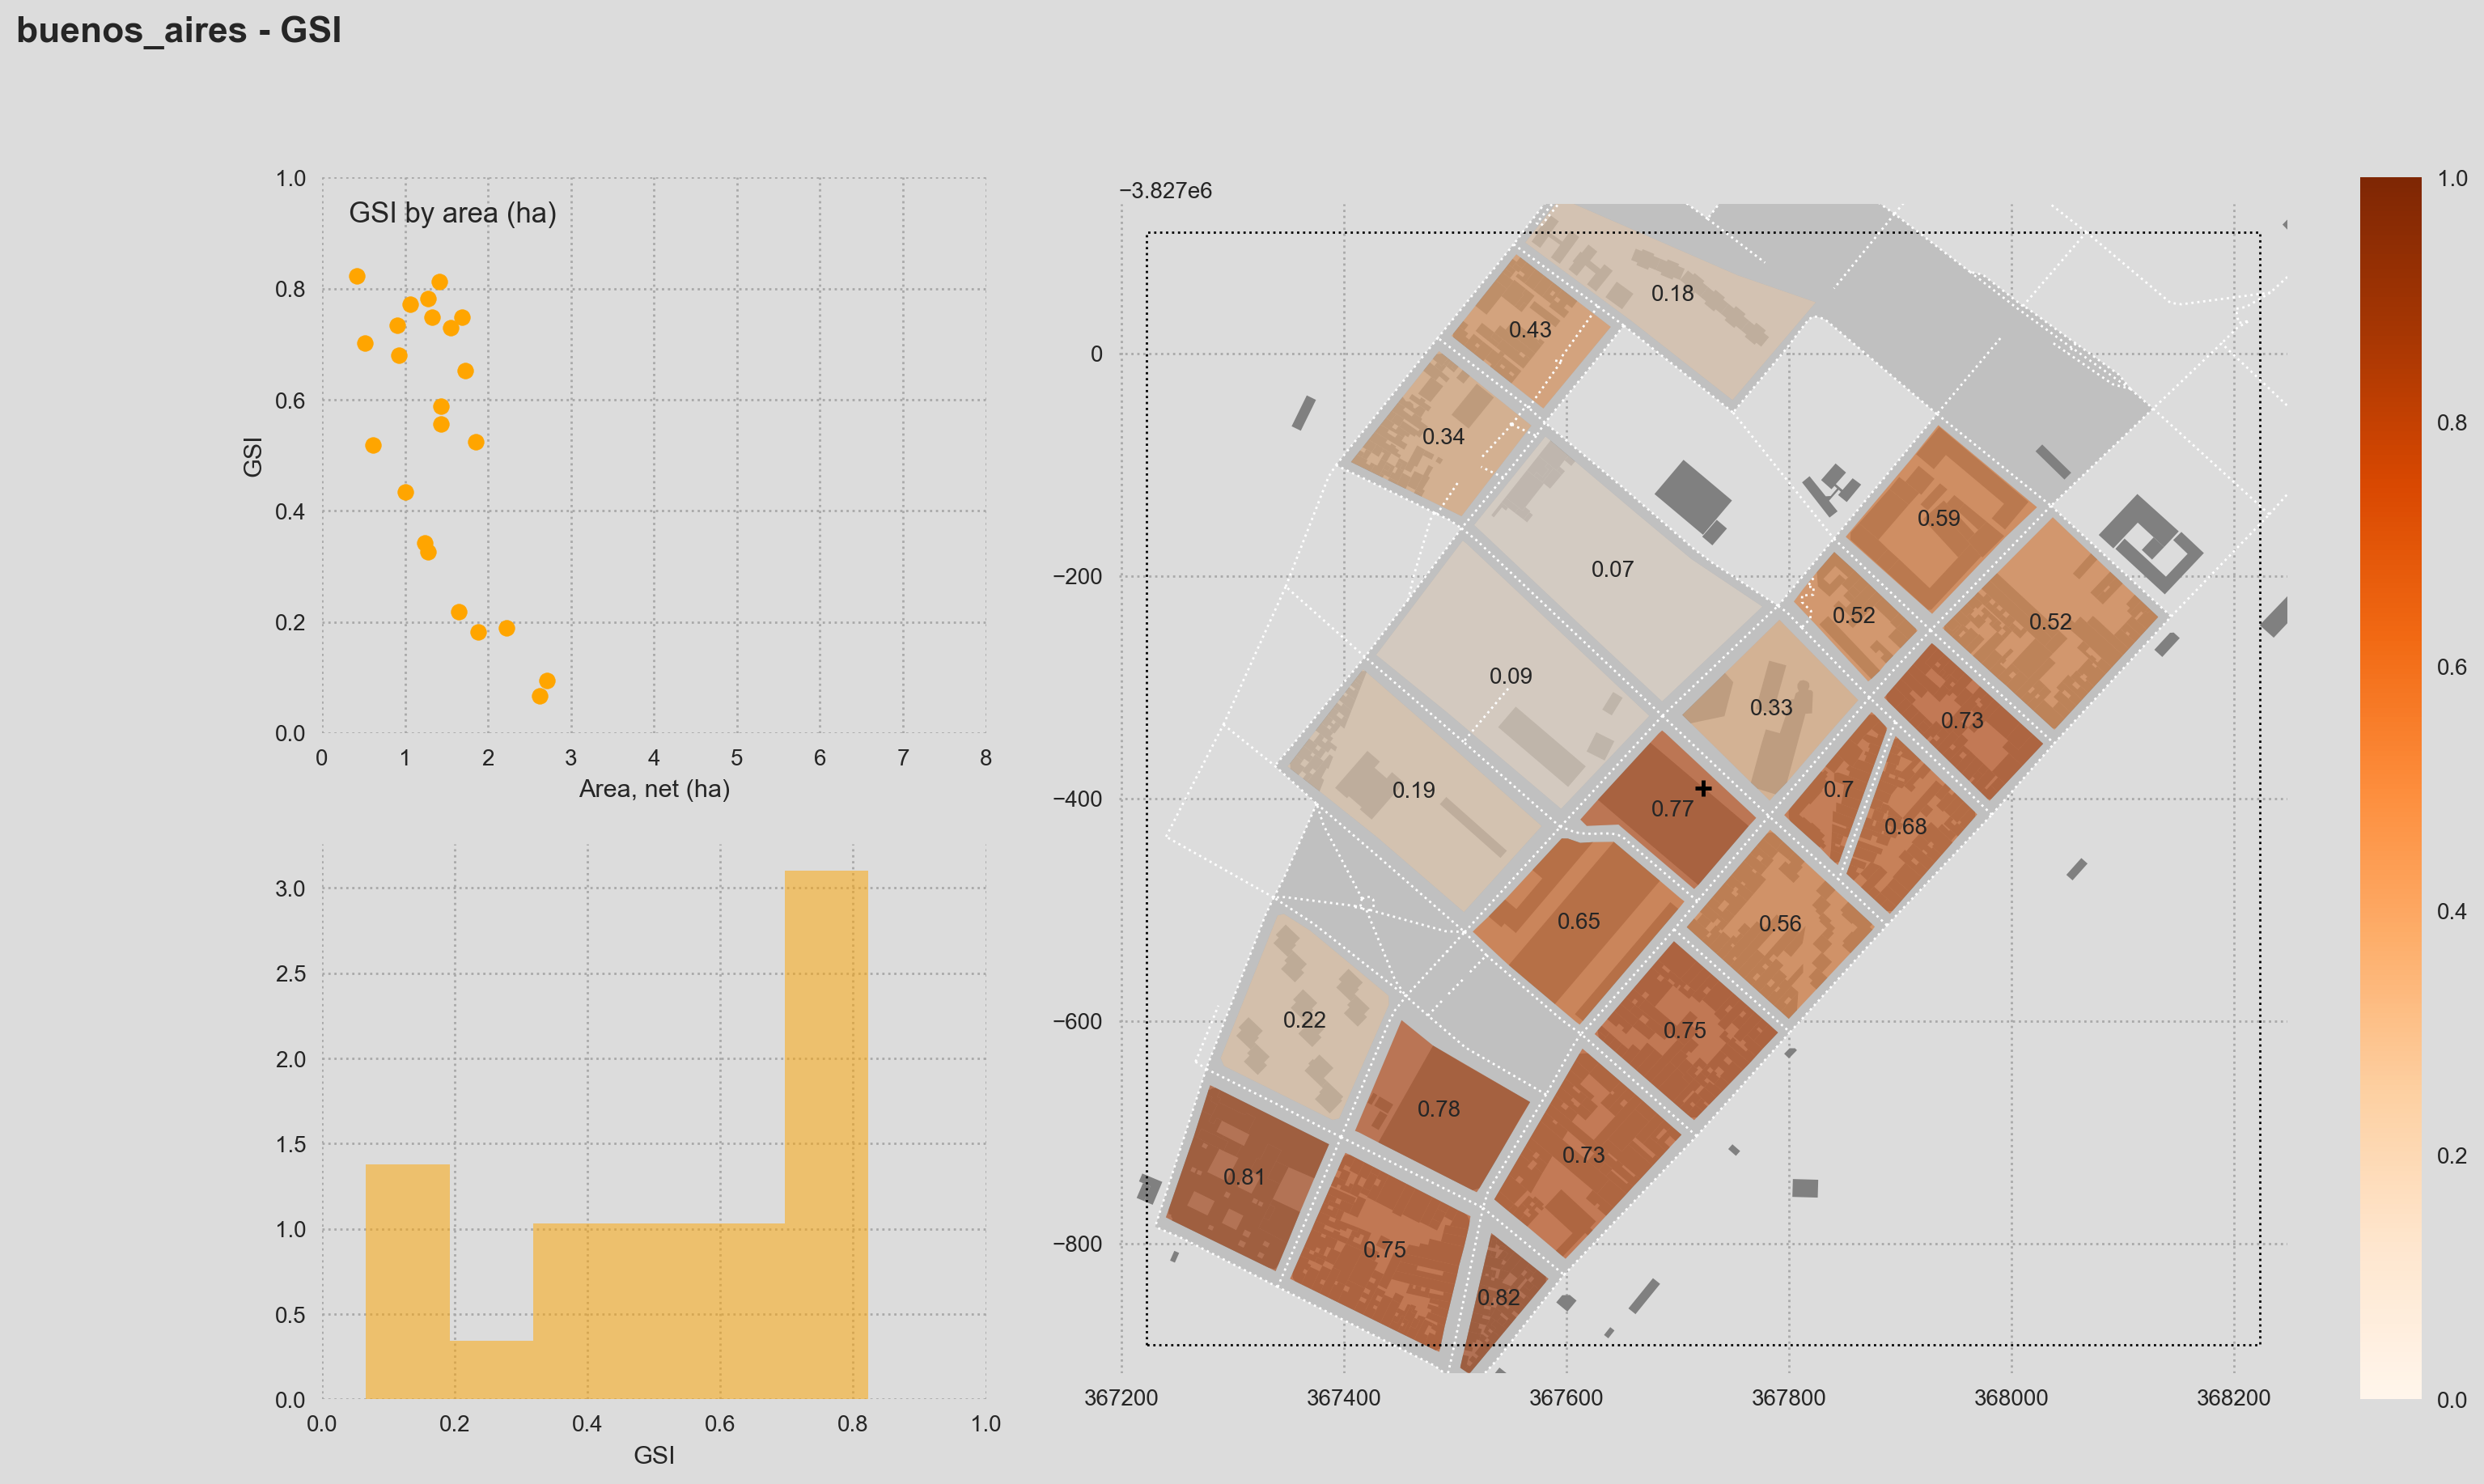

In [13]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - GSI', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_GSI_to_net_area(ax[0], city_blocks)
ouf.ax_GSI_distribution(ax[1], city_blocks)
ouf.ax_map_GSI(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/02_blocks_by_GSI_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

## City blocks coloured by FSI

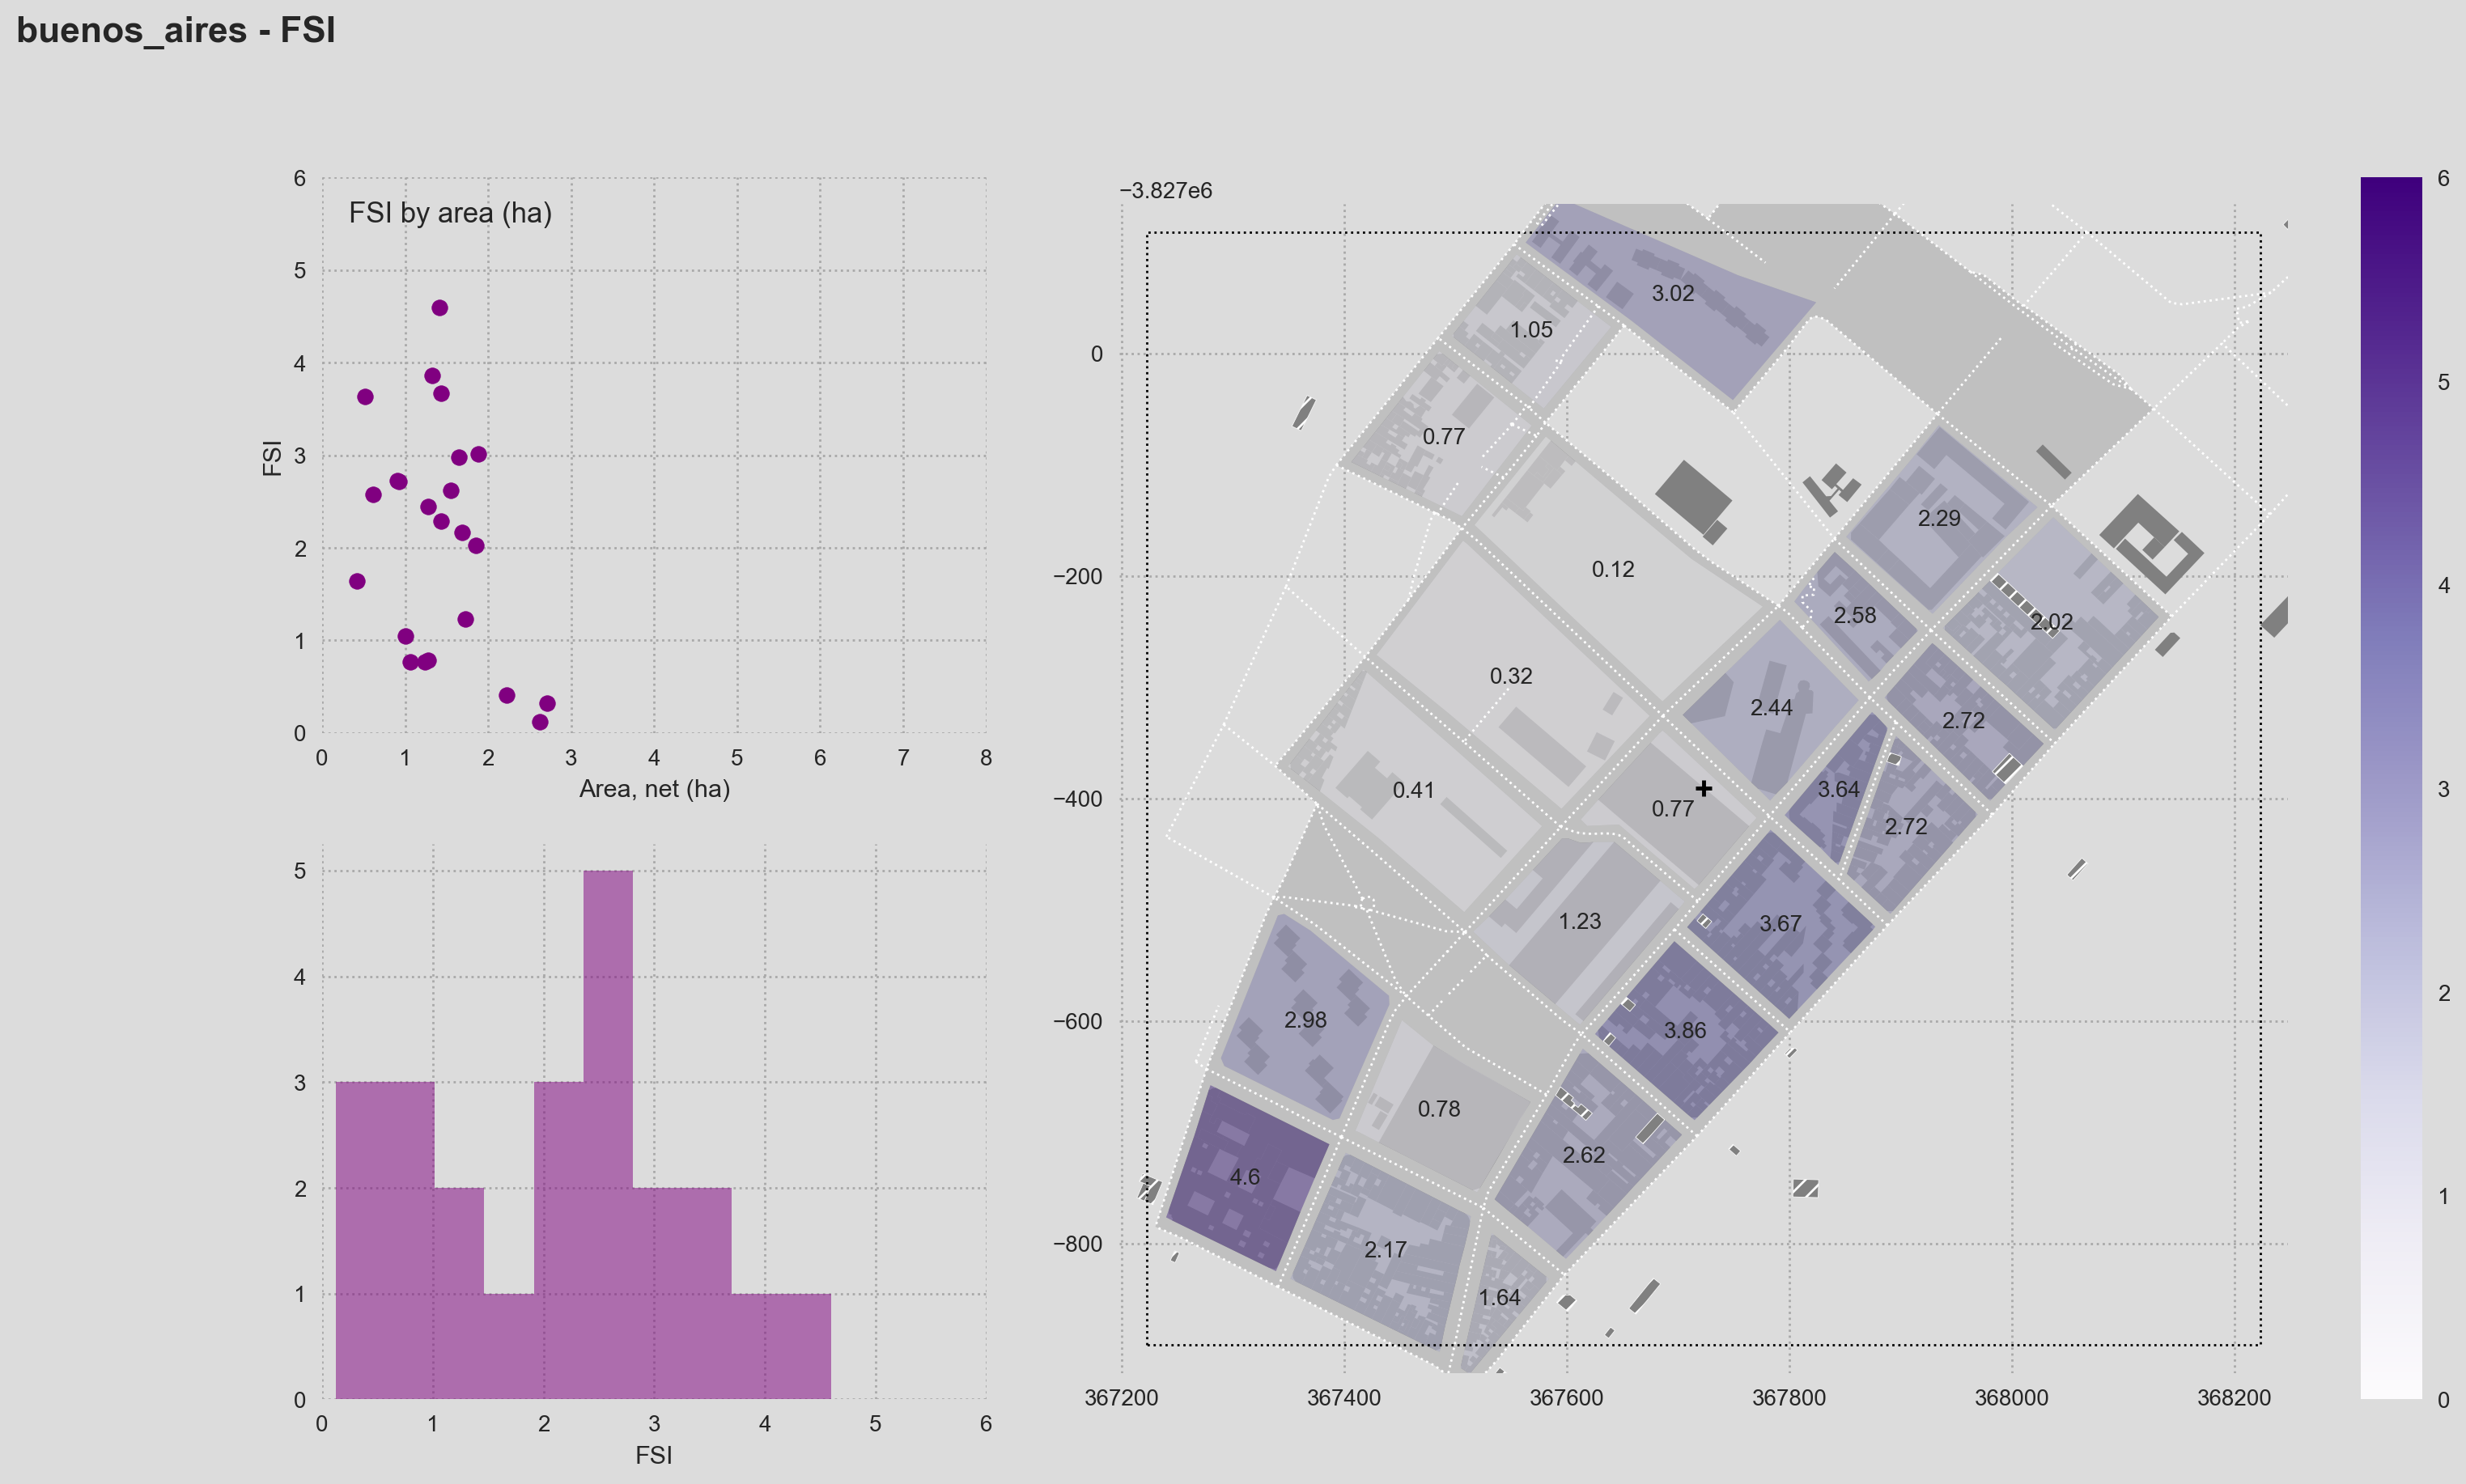

In [14]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - FSI', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_FSI_to_net_area(ax[0], city_blocks)
ouf.ax_FSI_distribution(ax[1], city_blocks)
ouf.ax_map_FSI(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/04_blocks_by_FSI_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

In [15]:
city_blocks.describe()

,perimeter_m,area_net_ha,perimeter_per_area,area_gross_ha,net_to_gross,footprint_m2,total_GEA_m2,GSI_net,GSI_gross,FSI_net,FSI_gross
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,485.174459,1.423341,379.947258,2.123281,0.714783,6621.922857,27186.359668,0.531387,0.380593,2.105860,1.474678
std,106.964635,0.593617,117.447171,1.424380,0.121613,3408.137465,18563.976304,0.248779,0.182757,1.252492,0.934010
min,311.049046,0.422772,254.983550,0.811452,0.240000,1735.118349,3222.486733,0.066062,0.043717,0.122692,0.098694
25%,419.739977,1.028724,308.856418,1.399039,0.725000,3615.628357,9712.147130,0.334129,0.246094,0.916783,0.647445
50%,477.976351,1.410976,344.029407,1.867389,0.750000,6290.514843,24687.643534,0.588207,0.427588,2.291471,1.620622
75%,521.274862,1.707326,405.897807,2.216161,0.765000,9820.886801,38986.511149,0.741676,0.534395,2.850320,2.004519
max,705.678295,2.706603,735.736400,7.857675,0.810000,12643.126004,64853.820468,0.822859,0.607272,4.596380,3.432450
